# 2.3 Complex Machine Learning Models and Keras Part 2 - Debilt

## Contents:

1. Import Libraries
2. Import Datasets
3. Data Wrangling
4. Reshaping the Model
5. Data Split
6. Random Forest Model
7. Features Importance

## 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split

## 2. Import Datasets

In [8]:
# Define path to dataset
path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/'

# Import dataset
df = pd.read_csv(os.path.join(path, 'Data Sets', 'df_cleaned_with_date.csv'))
df_pleasant = pd.read_csv(os.path.join(path, 'Data Sets', 'df_pleasant_with_date.csv'))

In [9]:
df.shape

(22950, 137)

In [10]:
df_pleasant.shape

(22950, 16)

## 3. Data Wrangling

In [12]:
# Filter the data for Debilt
list_debilt = list(x for x in df.columns if x.find('DEBILT') >=0)

# Create a dataframe with those columns
df_debilt = df[list_debilt]
df_debilt

,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max
0,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0
1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3
2,6,0.92,1.0165,0.28,0.01,3.0,6.8,4.6,9.9
3,8,0.95,1.0265,0.08,0.09,0.0,6.7,3.6,10.1
4,6,0.90,1.0243,0.04,0.39,0.0,8.0,2.4,11.2
...,...,...,...,...,...,...,...,...,...
22945,8,0.84,1.0190,1.13,0.22,2.8,15.7,12.8,19.4
22946,8,0.84,1.0177,1.13,0.22,3.5,16.0,10.3,20.5
22947,8,0.86,1.0174,1.13,0.22,3.3,15.8,9.3,21.1
22948,8,0.87,1.0174,1.13,0.22,6.0,14.4,10.3,20.2


In [13]:
# Filter data for Debilt in df_pleasant
pleasant_list_debilt = df_pleasant['DEBILT_pleasant_weather']
pleasant_list_debilt

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: DEBILT_pleasant_weather, Length: 22950, dtype: int64

In [14]:
df_debilt.shape

(22950, 9)

In [15]:
pleasant_list_debilt.shape

(22950,)

## 4. Reshaping the Model

In [17]:
X = df_debilt

In [18]:
y = pleasant_list_debilt

In [19]:
# Turn X and y from a df to arrays
X = np.array(X)
y = np.array(y)

In [20]:
X.shape

(22950, 9)

In [21]:
y.shape

(22950,)

## 5. Data Split

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 6. Random Forest Model

In [26]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


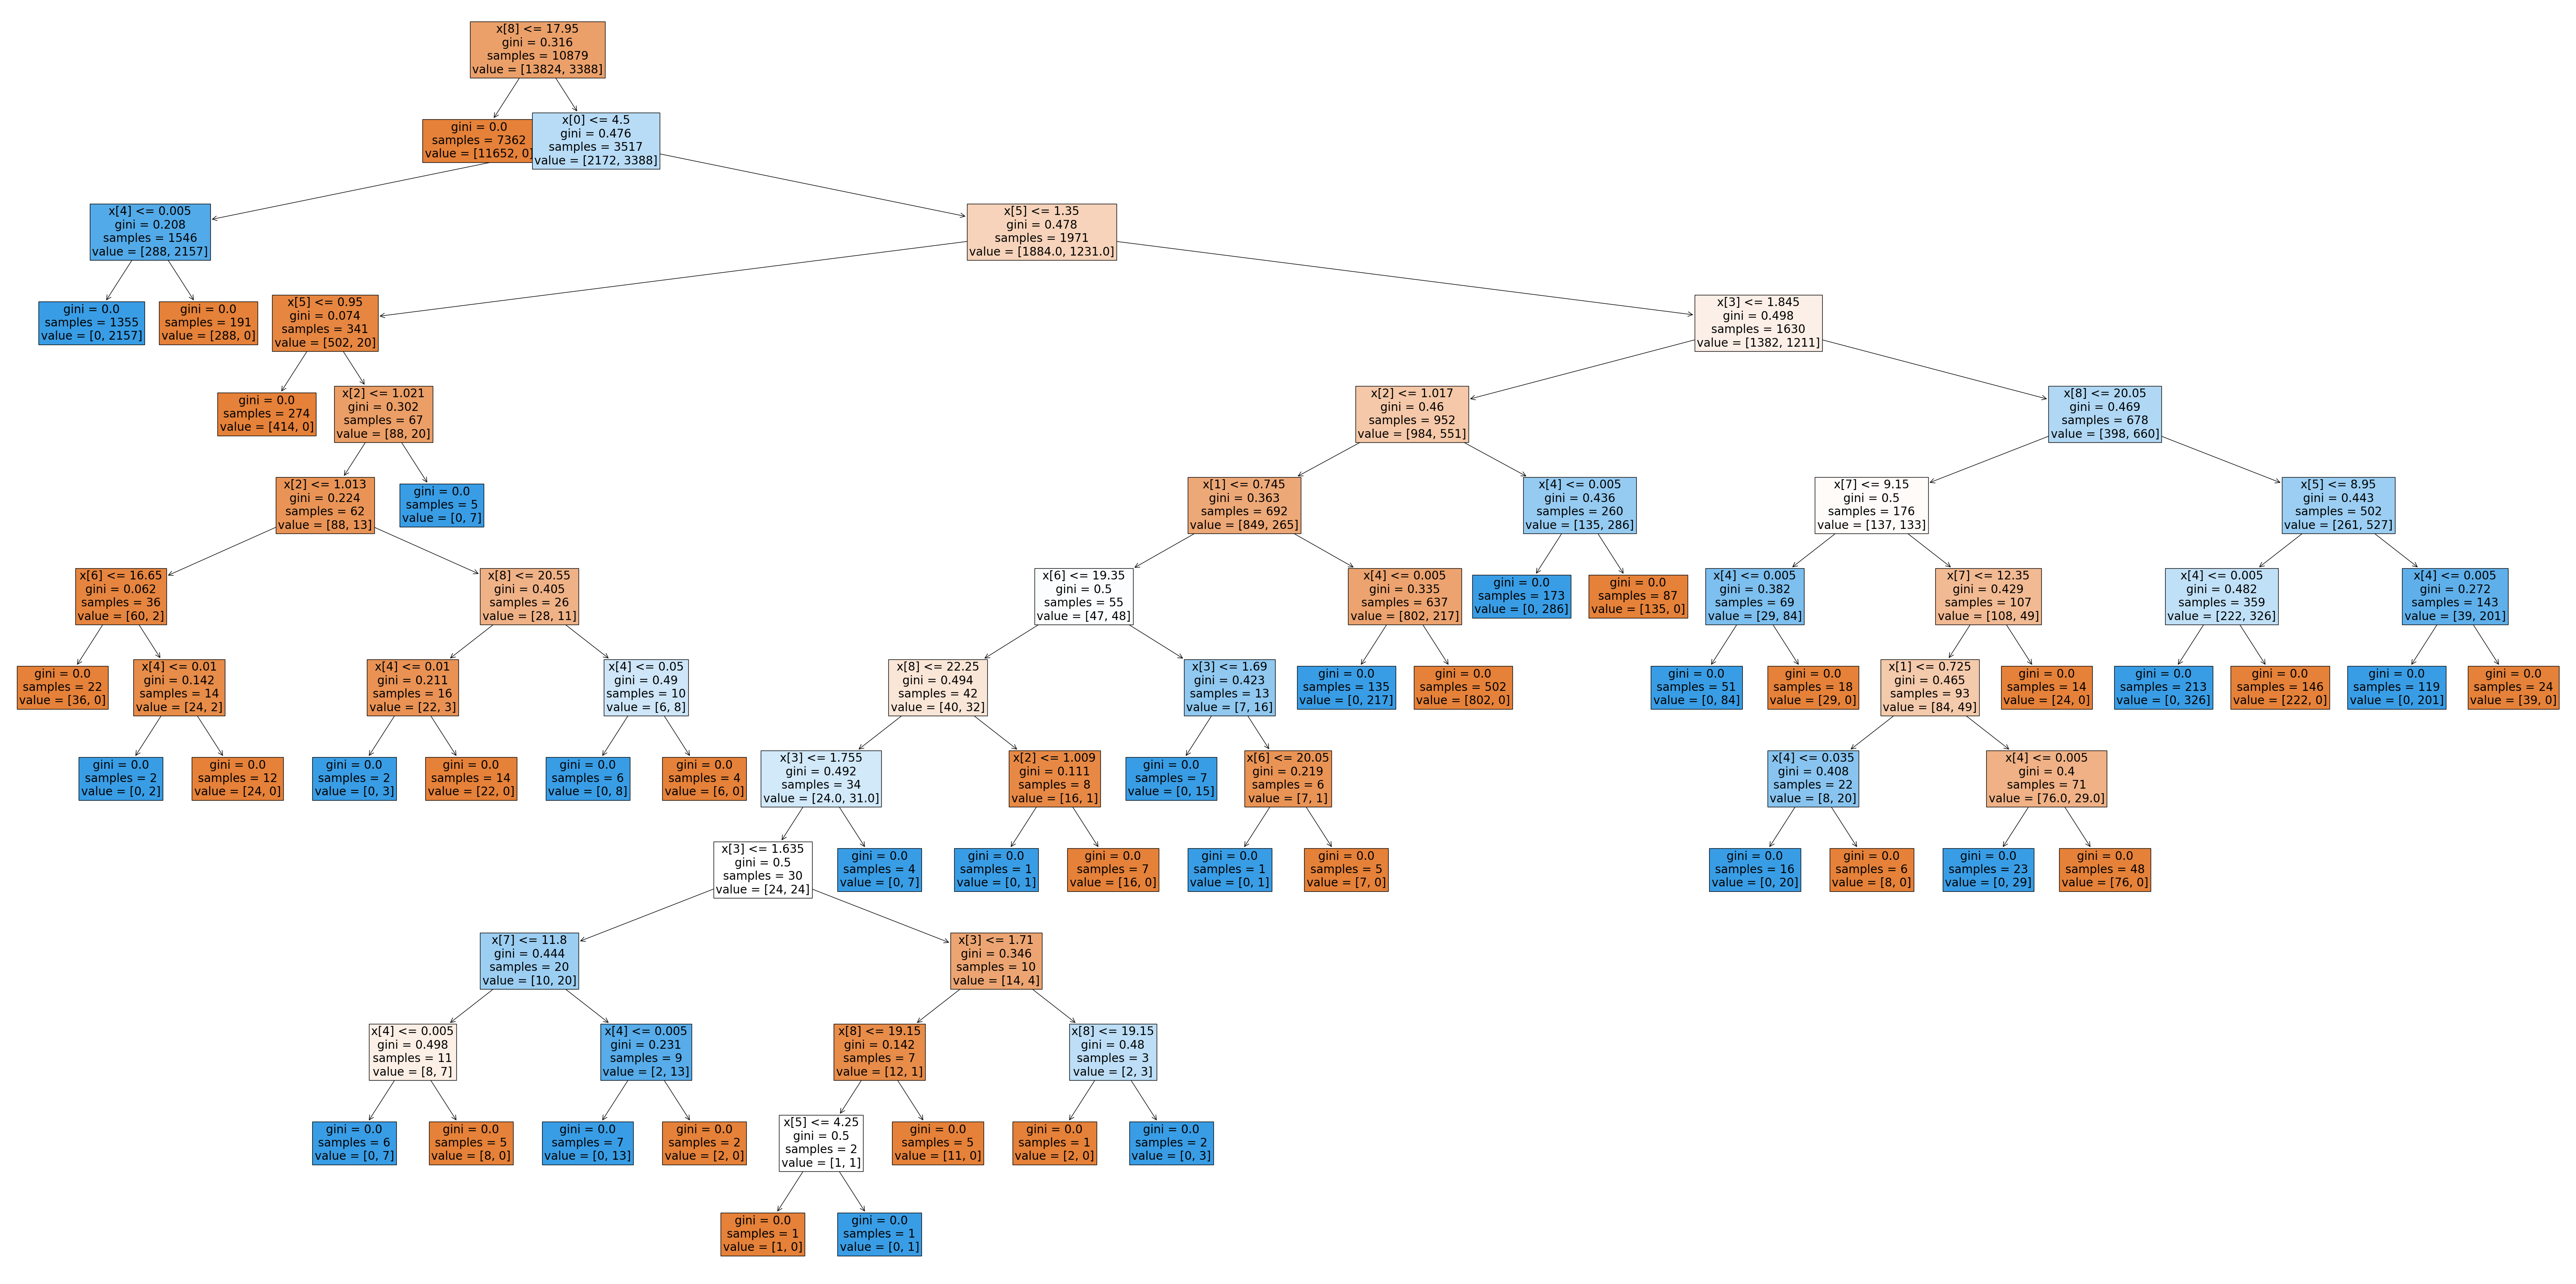

In [28]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [29]:
fig.savefig(os.path.join(path, 'Visualisations', 'random_forest_Debilt.png'))

## 7. Features Importance

In [31]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.03370517, 0.01254025, 0.01387834, 0.06981794, 0.31071491,
       0.08450816, 0.14278591, 0.03387404, 0.29817528])

In [32]:
# Create a list of weather features
wx_list = [feature.replace('DEBILT_', '') for feature in list_debilt]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [33]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.033705
humidity            0.012540
pressure            0.013878
global_radiation    0.069818
precipitation       0.310715
sunshine            0.084508
temp_mean           0.142786
temp_min            0.033874
temp_max            0.298175
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


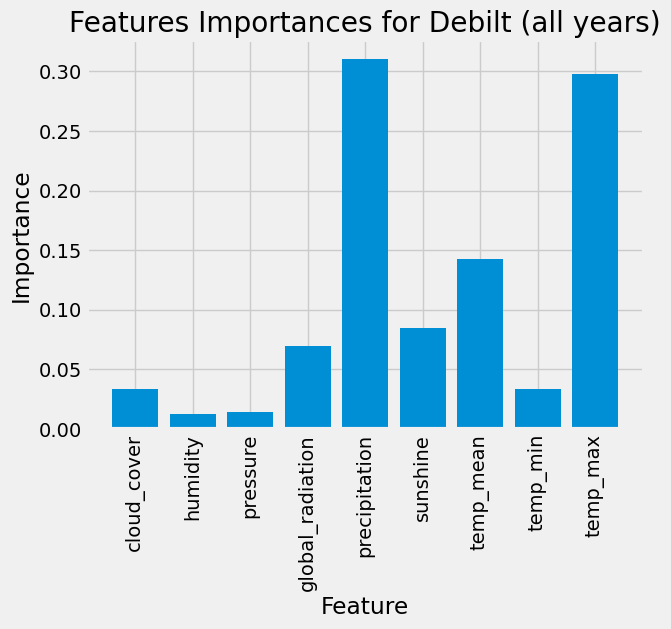

In [34]:
# Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Debilt (all years)');

plt.savefig(os.path.join(path, 'Visualisations', 'Debilt_feature_importances.png'), bbox_inches='tight')
plt.show()